##Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

##Lectura Wine dataset

In [4]:
datos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None,sep=',')
print("Samples, Features: " + str(datos.shape))
datos.columns = ['name','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
datos.head(1000)

Samples, Features: (178, 14)


,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
datos.info()
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 178 non-null    int64  
 1   alcohol              178 non-null    float64
 2   malicAcid            178 non-null    float64
 3   ash                  178 non-null    float64
 4   ashalcalinity        178 non-null    float64
 5   magnesium            178 non-null    int64  
 6   totalPhenols         178 non-null    float64
 7   flavanoids           178 non-null    float64
 8   nonFlavanoidPhenols  178 non-null    float64
 9   proanthocyanins      178 non-null    float64
 10  colorIntensity       178 non-null    float64
 11  hue                  178 non-null    float64
 12  od280_od315          178 non-null    float64
 13  proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Total,%
proline,0,0.0
od280_od315,0,0.0
hue,0,0.0
colorIntensity,0,0.0
proanthocyanins,0,0.0
nonFlavanoidPhenols,0,0.0
flavanoids,0,0.0
totalPhenols,0,0.0
magnesium,0,0.0
ashalcalinity,0,0.0


##mapa de correlacion

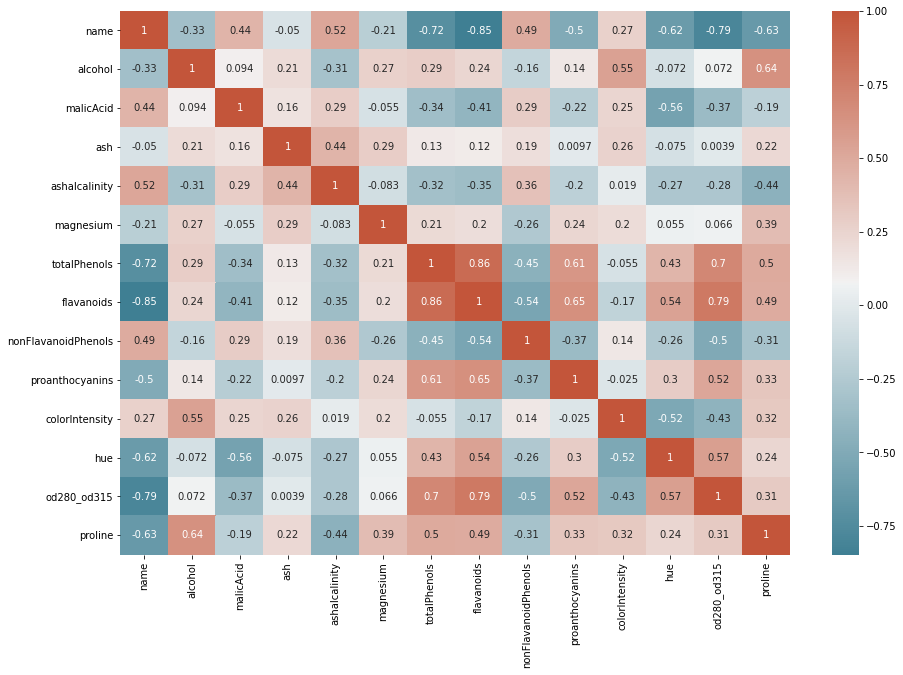

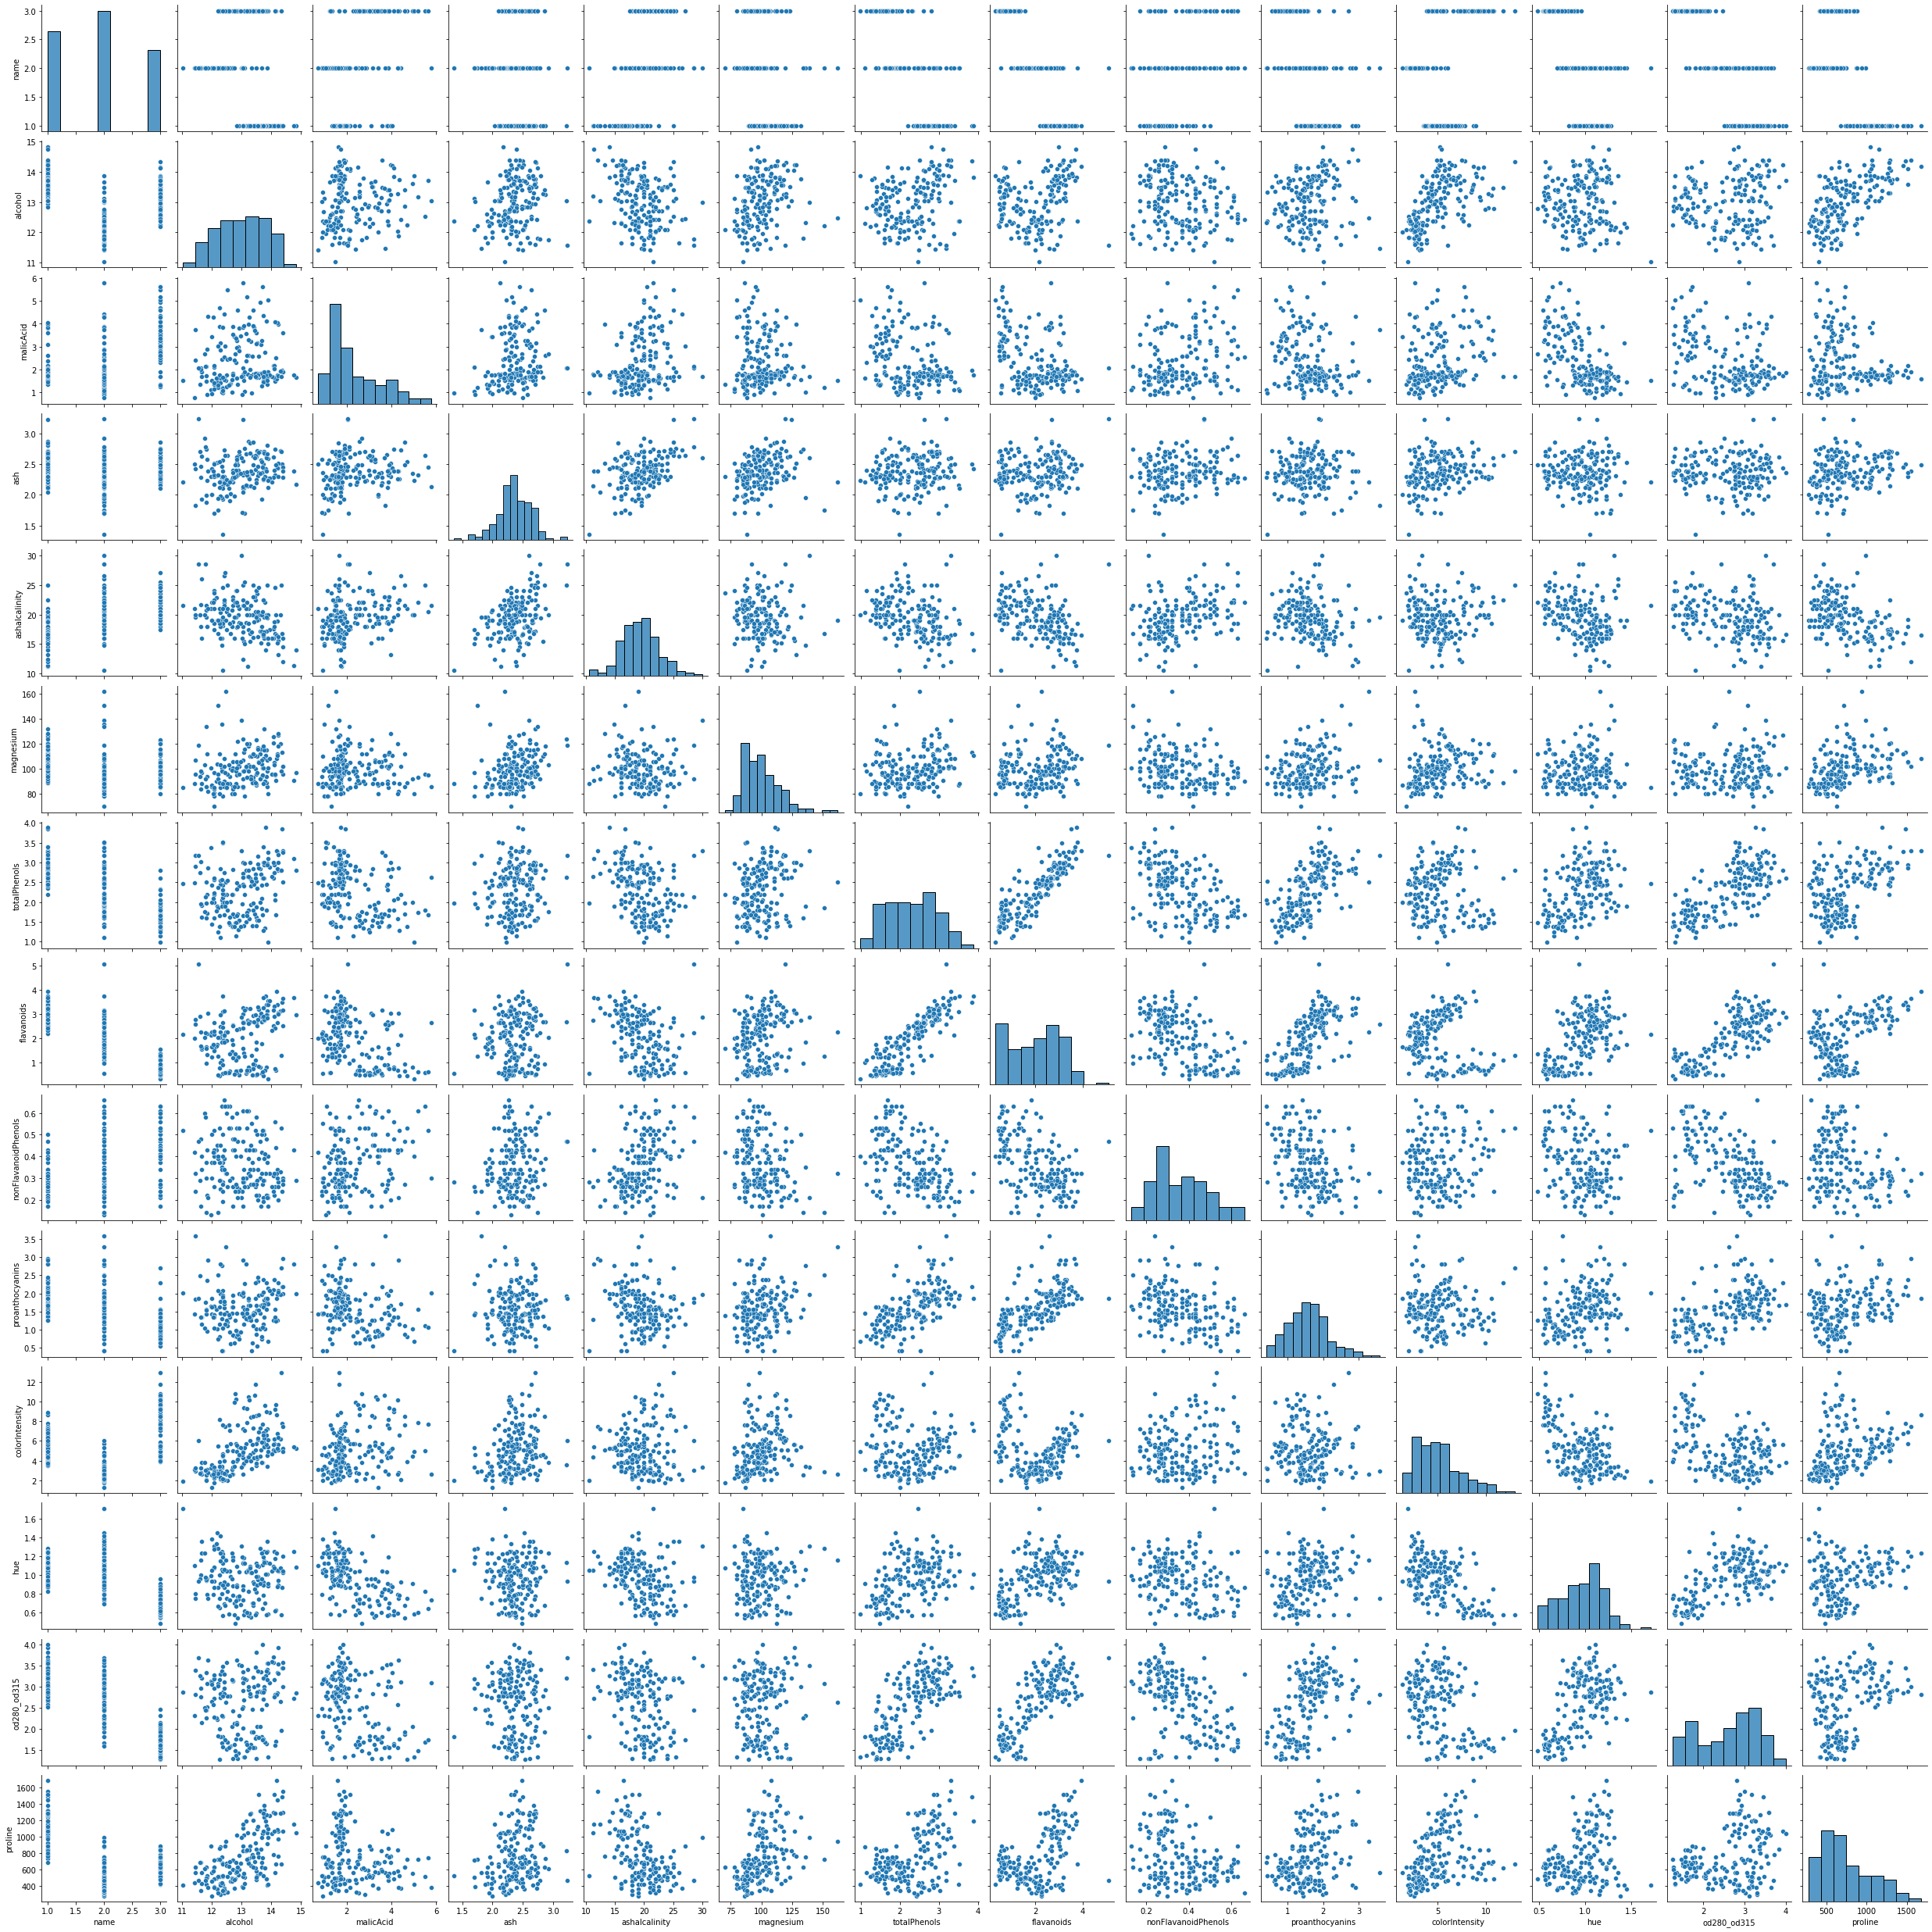

In [6]:
corr = datos.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.pairplot(datos)
plt.show()

##Normalizacion

In [7]:
X = datos.iloc[:,1:14]
Y = datos.iloc[:,0]
scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler1.fit(X)
X_n=scaler1.transform(X)
X_n = np.array(X_n)

##division del dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


##Metodos



##Perceptron

In [10]:
# Create a perceptron object with the parameters: 100 iterations (epochs) over the data, and a learning rate of 0.1
clf_per = Perceptron(max_iter=100, eta0=0.3, random_state=42)
# Train the perceptron
clf_per.fit(X_train,Y_train.ravel())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.3,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

prueba con datos de entrenamiento

Accuracy: 0.98


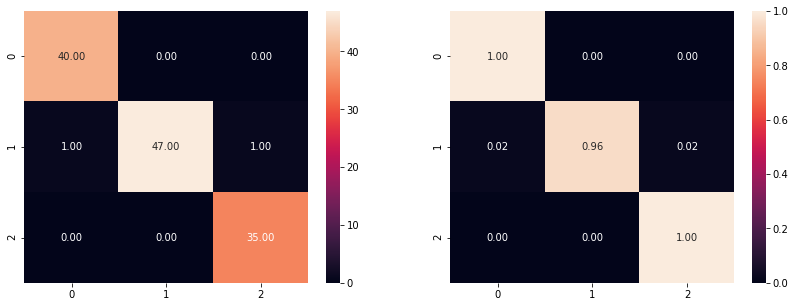

In [11]:
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(Y_train, y_pred_per))
sns.heatmap(confusion_matrix(Y_train, y_pred_per), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(Y_train, y_pred_per, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);

validacion

Accuracy: 1.00


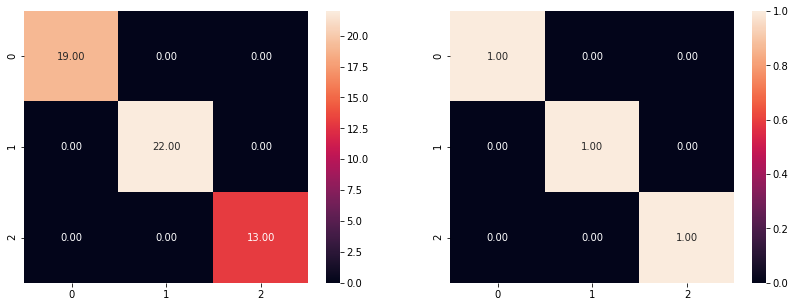

In [12]:
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
y_pred_per = clf_per.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred_per))
sns.heatmap(confusion_matrix(Y_test, y_pred_per), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(Y_test, y_pred_per, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);

Regresion Logistica

In [13]:
from sklearn.linear_model import LogisticRegression
# Create the classifier
clf_log = LogisticRegression(max_iter=100,random_state=42)
# Train the classifier
clf_log.fit(X_train, Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.99


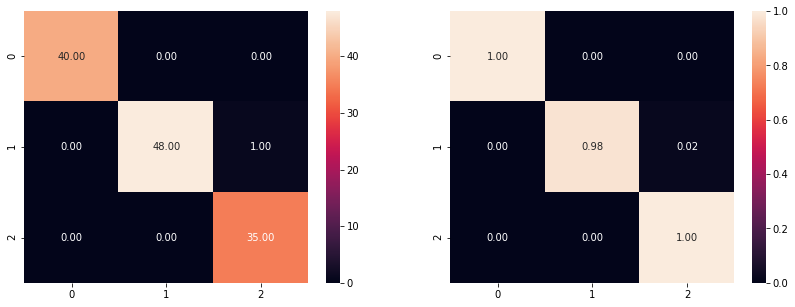

In [14]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred_log = clf_log.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(Y_train, y_pred_log))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_train, y_pred_log), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(Y_train, y_pred_log, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);

validacion

Accuracy: 1.00


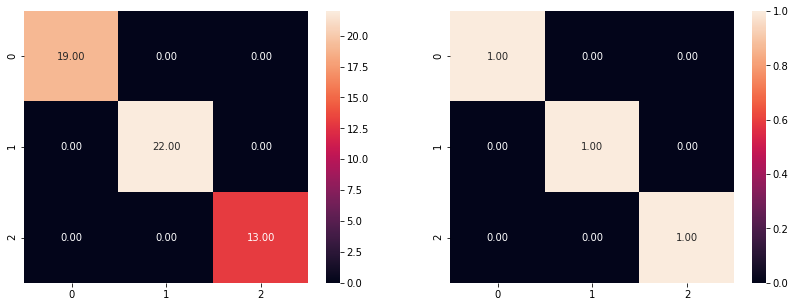

In [15]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred_log = clf_log.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred_log))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_test, y_pred_log), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(Y_test, y_pred_log, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);

Maquinas de soporte vectorial

creacion del pepeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
clf_svm = Pipeline([
        ("scaler", MinMaxScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42,max_iter=2000)),])
clf_svm.fit(X_train, Y_train.ravel())

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

Datos de entrenamiento

Accuracy: 0.97


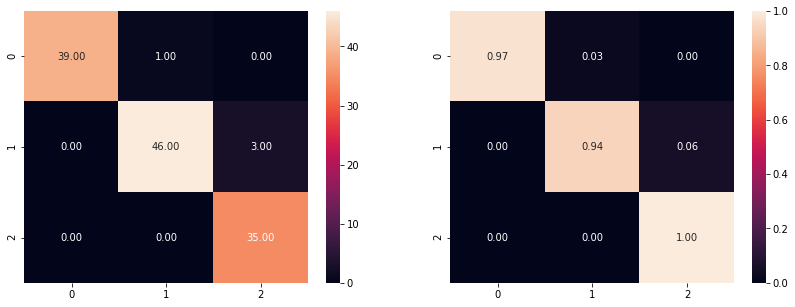

In [21]:
# Apply the trained classifier on the X data to make predicts for the y test data
y_pred_svm = clf_svm.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(Y_train, y_pred_svm))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_train, y_pred_svm), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(Y_train, y_pred_svm, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);

Validacion

Accuracy: 0.98


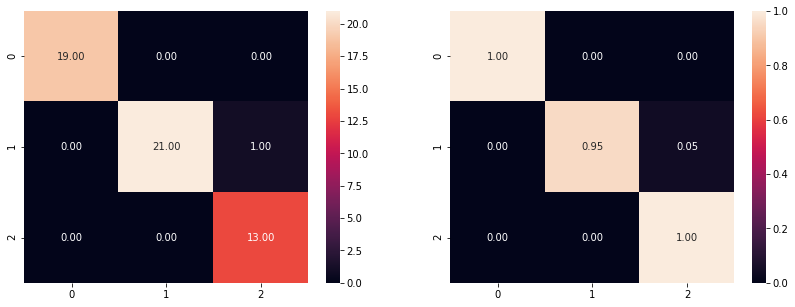

In [22]:
# Apply the trained classifier on the X data to make predicts for the y test data
y_pred_svm = clf_svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred_svm))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(Y_test, y_pred_svm, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
